In [1]:
#Homework 6
#Ethan Witkowski

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1

In [5]:
#Read in numpy array
eeg_data_original = np.load('eegdata.npy')
eeg_data_original.shape

(600, 4400)

In [6]:
#Create copy of data
eeg_data = np.copy(eeg_data_original)
eeg_data.shape

(600, 4400)

In [7]:
#Define buffer times
pre_buffer = list(range(0,1000))
post_buffer = list(range(2400,3400))

In [8]:
#Delete buffer times
eeg_data = np.delete(eeg_data, pre_buffer,1)
eeg_data = np.delete(eeg_data, post_buffer,1)

In [9]:
eeg_data.shape

(600, 2400)

In [10]:
#Read in text file
f = open('events.txt', 'r')
events_data = f.readlines()
f.close()

In [11]:
#Create list for text file data
for i, observation in enumerate(events_data):
    events_data[i] = observation.strip().split(',')

# 2

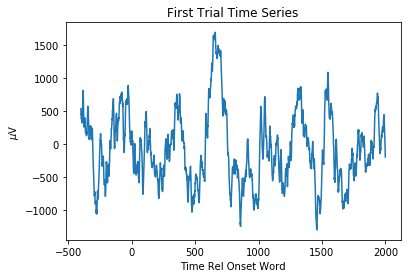

In [26]:
#Plot first eeg_data observation
time_series = range(-400,2000)
eeg_data_1 = eeg_data[1]

plt.figure()

plt.plot(time_series, eeg_data_1)

plt.ylabel('$\mu$V')
plt.xlabel('Time Rel Onset Word')
plt.title('First Trial Time Series')

plt.show()

# 3

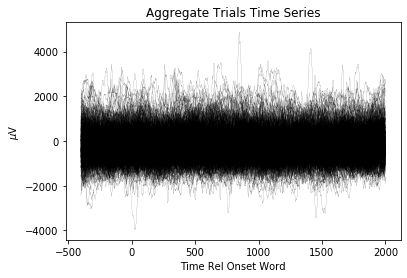

In [24]:
#Plot all eeg_data observations

plt.figure()

for i in eeg_data:
    plt.plot(time_series, i, linewidth=.1, color='black')

plt.ylabel('$\mu$V')
plt.xlabel('Time Rel Onset Word')
plt.title('Aggregate Trials Time Series')

plt.show()

# 4

In [53]:
#Find each trial's mean baseline voltage

baseline_trial = np.mean(eeg_data[:,0:400],axis=1)
baseline_trial.shape

(600,)

# 5

In [36]:
#Baseline-corrected time series

corr_eeg_data = np.empty([600,2400])

for i,row in enumerate(eeg_data):
    
    for j,column in enumerate(eeg_data):

        corr_eeg_data[i][j] = eeg_data[i][j] - baseline_trial[j]
        
corr_eeg_data.shape

(600, 2400)

# 6

In [69]:
#Compute overall ERP - average voltage across trials for each time step

test_mean_trial = np.nanmean(eeg_data[0:600,:],axis=0)

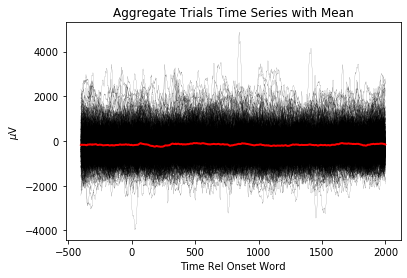

In [70]:
plt.figure()

for i in eeg_data:
    plt.plot(time_series, i, linewidth=.1, color='black')
    
plt.plot(time_series, test_mean_trial, linewidth=2, color='red')

plt.ylabel('$\mu$V')
plt.xlabel('Time Rel Onset Word')
plt.title('Aggregate Trials Time Series with Mean')

plt.show()

# 7

In [107]:
#Import .txt file

events_data = pd.read_csv('events.txt')

In [106]:
#Create recalled, not_recalled array

recalled = (events_data.recalled == 1)

not_recalled = (events_data.recalled == 0)

In [108]:
#Index eeg data, depending if word was recalled or not

trials_recalled = eeg_data[recalled, :]
print(trials_recalled.shape)

non_trials_recalled = eeg_data[not_recalled, :]
print(non_trials_recalled.shape)

(219, 2400)
(381, 2400)


In [109]:
#Recalled time series mean
recalled_mean_trial = np.nanmean(trials_recalled[0:600,:],axis=0)
print(recalled_mean_trial.shape)

#Not recalled time series mean
non_recalled_mean_trial = np.nanmean(non_trials_recalled[0:600,:],axis=0)
print(non_recalled_mean_trial.shape)

(2400,)
(2400,)


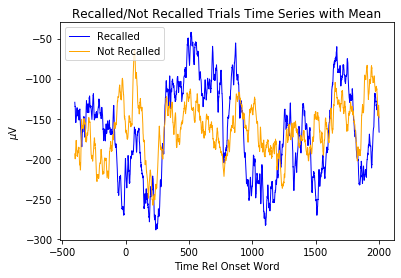

In [117]:
#Graph recalled mean vs non-recalled mean

plt.figure    
    
plt.plot(time_series, recalled_mean_trial, linewidth=1, color='blue', label='Recalled')
plt.plot(time_series, non_recalled_mean_trial, linewidth=1, color='orange', label='Not Recalled')

plt.ylabel('$\mu$V')
plt.xlabel('Time Rel Onset Word')
plt.title('Recalled/Not Recalled Trials Time Series with Mean')

plt.legend(loc='best')
plt.show()